In [ ]:
#Mount dữ liệu đến gg drive
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/HK2 - Năm 3/Phân tích dữ liệu kinh doanh - IS403.P21/Dữ liệu bài thực hành"

Mounted at /content/drive
/content/drive/My Drive/HK2 - Năm 3/Phân tích dữ liệu kinh doanh - IS403.P21/Dữ liệu bài thực hành


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Đọc file CSV
df = pd.read_csv('Intel Stock Price History.csv', sep=',')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/01/2025,22.05,22.56,22.62,21.66,64.06M,-2.91%
1,03/31/2025,22.71,22.38,22.75,21.75,65.83M,0.00%
2,03/28/2025,22.71,23.35,23.58,22.56,58.37M,-3.85%
3,03/27/2025,23.62,23.28,23.76,22.85,57.72M,0.85%
4,03/26/2025,23.42,24.25,24.42,23.25,59.68M,-3.22%


In [ ]:
# Chỉ lấy Date và Price
df = df[['Date', 'Price']]

# Chuyển Date thành datetime và sắp xếp
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Chuyển Date thành số ordinal
df['DateOrdinal'] = df['Date'].map(lambda date: date.toordinal())

<ipython-input-3-573d051e5bb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.head()

,Date,Price,DateOrdinal
2516,2015-04-01,30.81,735689
2515,2015-04-02,30.81,735690
2514,2015-04-06,31.04,735694
2513,2015-04-07,31.26,735695
2512,2015-04-08,31.31,735696


In [ ]:
# 2. Tiền xử lý - chuẩn hóa
X = df[['DateOrdinal']].values
y = df['Price'].values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [ ]:
# 3. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

In [ ]:
# 4. Huấn luyện mô hình mới
model = SVR(kernel='rbf', C=100, gamma=100, epsilon=0.0001)
#C= 1500000, epsilon = 0.0000001, gamma =100
#model = SVR(kernel='rbf', C=150000, gamma=100, epsilon=0.00001)
model.fit(X_train, y_train.ravel())

SVR(C=100, epsilon=0.0001, gamma=100)

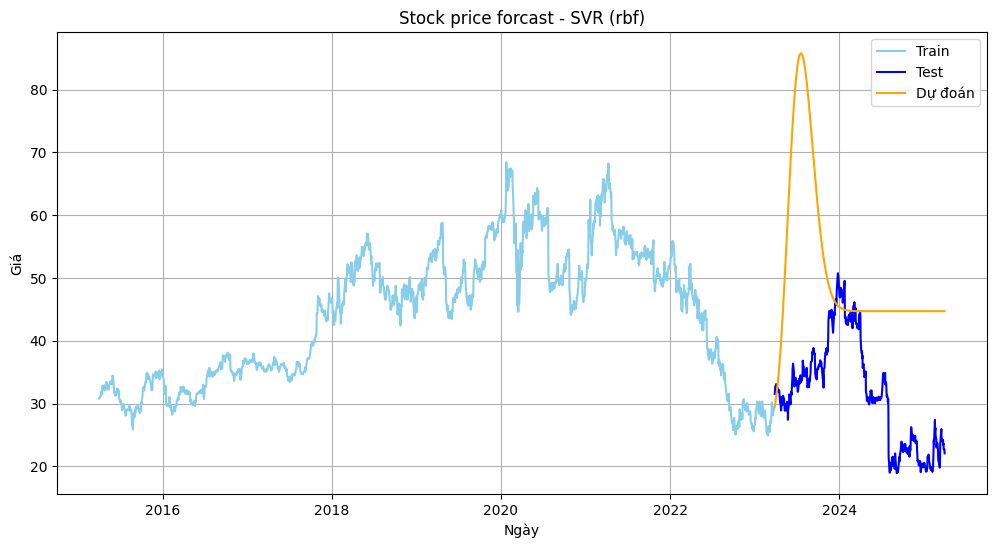

In [ ]:
# Dự đoán trên tập test
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
y_true = scaler_y.inverse_transform(y_test.reshape(-1,1)).ravel()

# 5. Vẽ biểu đồ kết quả
plt.figure(figsize=(12,6))
plt.plot(df['Date'][:len(X_train)], scaler_y.inverse_transform(y_train), label='Train', color='skyblue')
plt.plot(df['Date'][len(X_train):], scaler_y.inverse_transform(y_test), label='Test', color='blue')
plt.plot(df['Date'][len(X_train):], y_pred, label='Dự đoán', color='orange')
plt.title('Stock price forcast - SVR (rbf)')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 6. Tính metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R2  : {r2:.4f}")

RMSE: 23.7450
MAE : 19.4850
MAPE: 70.51%
R2  : -6.9903


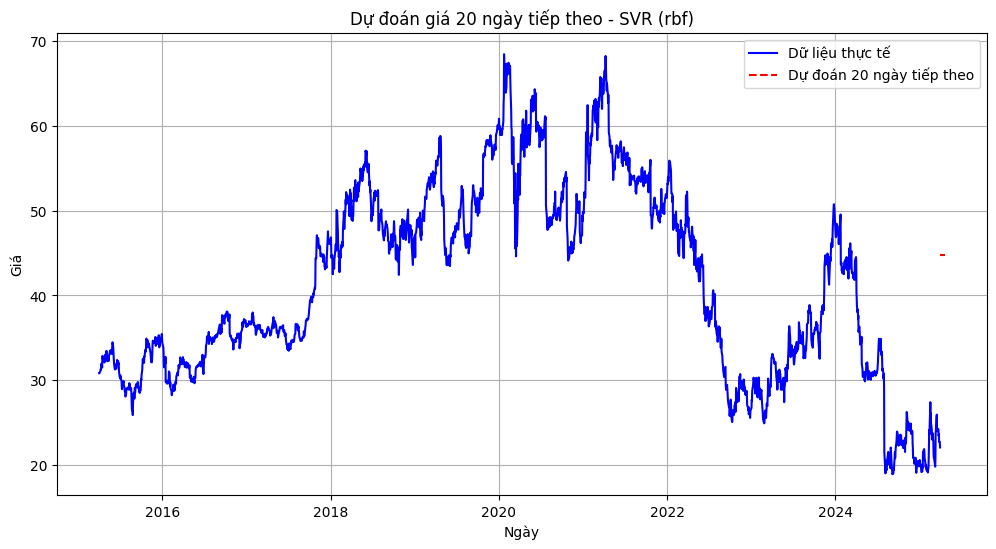

In [ ]:
# 7. Dự đoán 20 ngày tiếp theo
last_date = df['Date'].max()
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 21)]
future_dates_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1,1)
future_dates_scaled = scaler_X.transform(future_dates_ordinal)

future_preds_scaled = model.predict(future_dates_scaled)
future_preds = scaler_y.inverse_transform(future_preds_scaled.reshape(-1,1)).ravel()

# Vẽ biểu đồ dự đoán 20 ngày
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price'], label='Dữ liệu thực tế', color='blue')
plt.plot(future_dates, future_preds, label='Dự đoán 20 ngày tiếp theo', color='red', linestyle='--')
plt.title('Dự đoán giá 20 ngày tiếp theo - SVR (rbf)')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.show()